In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hrdkcodes/wine-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-data


In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/wine-data/wine.csv')
display(df.head())

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
X=df.drop(labels=['Wine'],axis=1)#independent feature
y=df['Wine']#dependent feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


# Feature Importance -Feature selection Techniue
You can get the feature importance  of each feature of your datset by using feature importance property of the model.

Feature importance give you a score for each feature of your data ,the higher the score more important feature or relevant is the feature towards your ouput variable.

Feature importance is an inbuilt class that comes with tree Based classifiers,  we will using Extra tree classifier for extracting the top 10 features for the dataset


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier(random_state=42)
model.fit(X_train,y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
print(model.feature_importances_)#use inbuilt class feature_importance of tree based classifiers

[0.12137995 0.04050491 0.02817711 0.03924465 0.02801946 0.05717005
 0.17025356 0.02745383 0.0310347  0.13636476 0.07908032 0.12151052
 0.11980616]


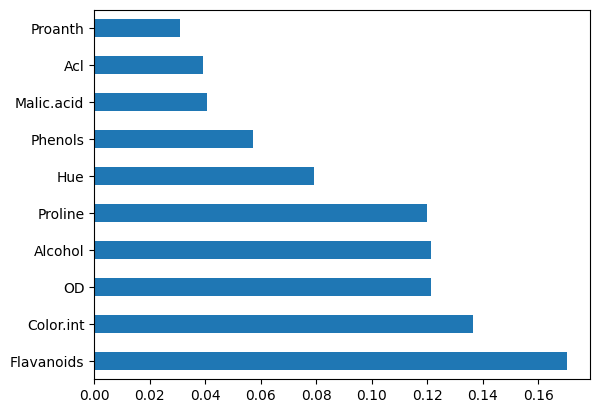

In [ ]:
#plot graph of feature importance of top 10 value
import pandas as pd
feat_importance= pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

here you show thar Flavanoids has the highest value  